In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image = cv2.imread('img/people2.jpg')

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-4-fe797203fd48>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


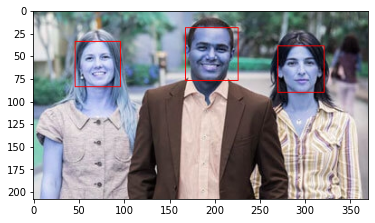

In [4]:
# Given the image above, lets detect faces on the image using haar cascades
# First create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml
face_clf = cv2.CascadeClassifier("Haarcascades/haarcascade_frontalface_default.xml")

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
faces = face_clf.detectMultiScale(image_gray, minNeighbors=4)

# If no faces detected print("No faces found")
if faces is():
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 1) 

plt.imshow(image);

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-5-2dfa53967e45>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


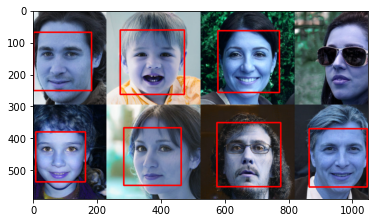

In [5]:
people = cv2.imread("img/faces.jpg")
people_gray = cv2.cvtColor(people, cv2.COLOR_BGR2GRAY) 

#face_clf = cv2.CascadeClassifier("Haarcascades/haarcascade_frontalface_default.xml")
faces = face_clf.detectMultiScale(people_gray, minNeighbors=4) 

if faces is():
    print("No faces found") 
    
for (x, y, w, h) in faces:
    cv2.rectangle(people, (x, y), (x+w, y+h), (255, 0, 0), 3) 
    
plt.imshow(people);

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-6-a86b663587f1>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is():


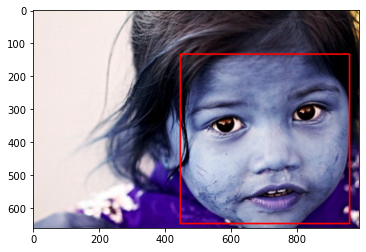

In [6]:
# Repeat the process above with your own images
kid = cv2.imread("img/kid.jpg")
kid_gray = cv2.cvtColor(kid, cv2.COLOR_BGR2GRAY) 

#face_clf = cv2.CascadeClassifier("Haarcascades/haarcascade_frontalface_default.xml")
faces = face_clf.detectMultiScale(kid_gray)

# If no faces detected print("No faces found")
if faces is():
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for (x, y, w, h) in faces:
    cv2.rectangle(kid, (x, y), (x+w, y+h), (255, 0, 0), 3) 

plt.imshow(kid);

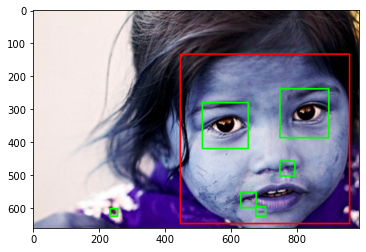

In [8]:
# Now do the same but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml
kid = cv2.imread("img/kid.jpg")
kid_gray = cv2.cvtColor(kid, cv2.COLOR_BGR2GRAY) 

face_clf = cv2.CascadeClassifier("Haarcascades/haarcascade_frontalface_default.xml")
faces = face_clf.detectMultiScale(kid_gray)

eye_clf = cv2.CascadeClassifier("Haarcascades/haarcascade_eye.xml")
eyes = eye_clf.detectMultiScale(kid_gray)

for (x, y, w, h) in faces:
    cv2.rectangle(kid, (x, y), (x+w, y+h), (255, 0, 0), 3) 
    
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(kid, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 3)

plt.imshow(kid);
     

In [8]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam
face_clf = cv2.CascadeClassifier("Haarcascades/haarcascade_frontalface_default.xml")
eye_clf = cv2.CascadeClassifier("Haarcascades/haarcascade_eye.xml")

video = cv2.VideoCapture(0) 

while (video.isOpened()):
    check, img = video.read() 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    faces = face_clf.detectMultiScale(gray) 
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_clf.detectMultiScale(roi_gray) 
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2) 
            
    cv2.imshow("img", img)
    if cv2.waitKey(1) == ord("q"):
        break
        
video.release()
cv2.destroyAllWindows() 
